# single-cell RNA-seq data analysis pipeline

Dataset from: https://cell2location.cog.sanger.ac.uk/tutorial/mouse_brain_visium_wo_cloupe_data.zip

Package used: Scanpy

From Tutorial:
Anndata library, short for "AnnData" (Annotated Data), data structure in the field of single-cell RNA sequencing (scRNA-seq) analysis. It is part of the Scanpy library and provides a flexible and efficient way to store, manipulate, and analyze scRNA-seq data.

Rows= Cells
Columns = Genes

## **Load data**
<br>
We will be using 10X Visum data spatial transcriptomics technology data from 10x's website. Data has been filtered

In [2]:
conda install -c conda-forge scanpy

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aubhi\anaconda3

  added / updated specs:
    - scanpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anndata-0.9.2              |     pyhd8ed1ab_0          85 KB  conda-forge
    h5py-3.9.0                 |   py39hfc34f40_0         914 KB
    hdf5-1.12.1                |nompi_h2a0e4a3_100        22.8 MB  conda-forge
    libllvm14-14.0.6           |       h4157e71_3          55 KB
    llvmlite-0.40.0            |   py39hf2fb9eb_0        18.2 MB
    natsort-8.4.0              |     pyhd8ed1ab_0          36 KB  conda-forge
    networkx-3.1               |     pyhd8ed1ab_0         1.4 MB  conda-forge
    numba-0.57.0               |   py39h4ed8f06_0         4.2 MB
    numpy-1.24.3               |   py39h79a8e48_1          11 KB



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::featuretools==0.27.0=pyhd8ed1ab_0
  - defaults/win-64::lightgbm==3.3.5=py39hd77b12b_0
  - defaults/win-64::py-xgboost==1.7.3=py39haa95532_0
  - defaults/win-64::scikit-learn==1.3.0=py39h4ed8f06_0
  - conda-forge/noarch::tpot==0.12.0=pyhd8ed1ab_0


In [1]:
pip install 'matplotlib<3.7'

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [10]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

C:\Users\aubhi\anaconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Raw data can also be read in csv or h5 or matrix

In [11]:
# Set paths to data 
sp_data_folder = r'C:\Users\aubhi\OneDrive - University of California, San Francisco\Desktop\Springboard\Notebooks from web\Outside\scRNAseq project'

In [12]:
counts = pd.read_csv('Cell_gene_matrix.csv')
counts

,NAME,A8_B001543,B2_B001558,B4_B001543,C19_B002079,C8_B001558,F12_B002077,F8_B001548,G11_B001543,G4_B001558,...,P11_B001543,E5_B001545,I17_B002078,M10_B001548,M8_B003577,D15_B002078,H15_B000420,H16_B002078,B5_B001548,C6_B001556
0,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.00000,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,1.000000
1,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400726,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
2,A1BG-AS1,0.009379,0.000000,0.000000,0.000000,0.000000,0.000000,0.733165,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
3,A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
4,A2M,0.000000,0.006869,0.011014,0.000000,0.000000,0.000000,0.000000,0.812852,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.006371,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26481,ZYG11A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
26482,ZYG11B,0.926836,0.037208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.47195,0.000000,0.0,0.579299,0.05578,0.099384,0.000000,0.019853
26483,ZYX,0.000000,0.000000,0.000000,0.000000,0.008932,0.000000,0.000000,0.000000,0.307546,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.04487,0.892191,1.682354,1.415350
26484,ZZEF1,0.000000,0.010286,0.351264,0.738276,0.017784,0.959532,0.027016,0.615808,0.000000,...,0.0,1.188205,0.00000,0.161704,0.0,0.000000,0.00000,0.000000,0.000000,1.013221


In [13]:
#Transpose
counts_t= counts.T
counts_t.head()

,0,1,2,3,4,5,6,7,8,9,...,26476,26477,26478,26479,26480,26481,26482,26483,26484,26485
NAME,NaN,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A8_B001543,1.0,0.0,0.009379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.495156,0.0,0.926836,0.0,0.0,0.0
B2_B001558,1.0,0.0,0.0,0.0,0.006869,0.0,0.0,0.156034,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037208,0.0,0.010286,0.0
B4_B001543,1.0,0.0,0.0,0.0,0.011014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351264,1.164398
C19_B002079,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.738276,0.989481


In [14]:
counts_t.describe

<bound method NDFrame.describe of             0     1         2     3         4        5      6         7      \
NAME          NaN  A1BG  A1BG-AS1  A1CF       A2M  A2M-AS1  A2ML1     A2MP1   
A8_B001543    1.0   0.0  0.009379   0.0       0.0      0.0    0.0       0.0   
B2_B001558    1.0   0.0       0.0   0.0  0.006869      0.0    0.0  0.156034   
B4_B001543    1.0   0.0       0.0   0.0  0.011014      0.0    0.0       0.0   
C19_B002079   1.0   0.0       0.0   0.0       0.0      0.0    0.0       0.0   
...           ...   ...       ...   ...       ...      ...    ...       ...   
D15_B002078   1.0   0.0       0.0   0.0       0.0      0.0    0.0       0.0   
H15_B000420   1.0   0.0       0.0   0.0       0.0      0.0    0.0       0.0   
H16_B002078   1.0   0.0       0.0   0.0       0.0      0.0    0.0       0.0   
B5_B001548    1.0   0.0       0.0   0.0  0.006371      0.0    0.0       0.0   
C6_B001556    1.0   0.0       0.0   0.0       0.0      0.0    0.0       0.0   

               8 

In [15]:
counts_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, NAME to C6_B001556
Columns: 26486 entries, 0 to 26485
dtypes: object(26486)
memory usage: 77.6+ MB


In [16]:
#copy counts
counts_t_df = counts_t.copy()

In [17]:
#Replace nans with 0
counts_t_df.fillna(0)
counts_t_df

,0,1,2,3,4,5,6,7,8,9,...,26476,26477,26478,26479,26480,26481,26482,26483,26484,26485
NAME,NaN,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A8_B001543,1.0,0.0,0.009379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.495156,0.0,0.926836,0.0,0.0,0.0
B2_B001558,1.0,0.0,0.0,0.0,0.006869,0.0,0.0,0.156034,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037208,0.0,0.010286,0.0
B4_B001543,1.0,0.0,0.0,0.0,0.011014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351264,1.164398
C19_B002079,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.738276,0.989481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10484,0.0,0.600743,0.0,0.0,0.579299,0.0,0.0,0.0
H15_B000420,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.05578,0.0,0.0,0.05578,0.04487,0.0,0.0
H16_B002078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.356078,0.0,0.0,1.207038,0.0,0.099384,0.892191,0.0,0.0
B5_B001548,1.0,0.0,0.0,0.0,0.006371,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.682354,0.0,0.0


In [18]:
counts_t_df.isna().sum(axis= 1)

NAME           1
A8_B001543     0
B2_B001558     0
B4_B001543     0
C19_B002079    0
              ..
D15_B002078    0
H15_B000420    0
H16_B002078    0
B5_B001548     0
C6_B001556     0
Length: 384, dtype: int64

In [19]:
counts_t_df

,0,1,2,3,4,5,6,7,8,9,...,26476,26477,26478,26479,26480,26481,26482,26483,26484,26485
NAME,NaN,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A8_B001543,1.0,0.0,0.009379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.495156,0.0,0.926836,0.0,0.0,0.0
B2_B001558,1.0,0.0,0.0,0.0,0.006869,0.0,0.0,0.156034,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037208,0.0,0.010286,0.0
B4_B001543,1.0,0.0,0.0,0.0,0.011014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351264,1.164398
C19_B002079,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.738276,0.989481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10484,0.0,0.600743,0.0,0.0,0.579299,0.0,0.0,0.0
H15_B000420,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.05578,0.0,0.0,0.05578,0.04487,0.0,0.0
H16_B002078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.356078,0.0,0.0,1.207038,0.0,0.099384,0.892191,0.0,0.0
B5_B001548,1.0,0.0,0.0,0.0,0.006371,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.682354,0.0,0.0


In [20]:
counts_t_df.drop(counts_t_df.columns[0], axis=1, inplace=True)
counts_t_df

,1,2,3,4,5,6,7,8,9,10,...,26476,26477,26478,26479,26480,26481,26482,26483,26484,26485
NAME,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A8_B001543,0.0,0.009379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.495156,0.0,0.926836,0.0,0.0,0.0
B2_B001558,0.0,0.0,0.0,0.006869,0.0,0.0,0.156034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037208,0.0,0.010286,0.0
B4_B001543,0.0,0.0,0.0,0.011014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351264,1.164398
C19_B002079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.738276,0.989481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10484,0.0,0.600743,0.0,0.0,0.579299,0.0,0.0,0.0
H15_B000420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.05578,0.0,0.0,0.05578,0.04487,0.0,0.0
H16_B002078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.356078,0.0,0.0,1.207038,0.0,0.099384,0.892191,0.0,0.0
B5_B001548,0.0,0.0,0.0,0.006371,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.682354,0.0,0.0


In [21]:
counts_t_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, NAME to C6_B001556
Columns: 26485 entries, 1 to 26485
dtypes: object(26485)
memory usage: 77.6+ MB


In [22]:
counts_t_df.to_csv('counts_t_df.csv')

In [23]:
new_column_index = counts_t_df.iloc[0]
counts_t_df.columns = new_column_index
counts_t_df

NAME,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
NAME,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A8_B001543,0.0,0.009379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.495156,0.0,0.926836,0.0,0.0,0.0
B2_B001558,0.0,0.0,0.0,0.006869,0.0,0.0,0.156034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037208,0.0,0.010286,0.0
B4_B001543,0.0,0.0,0.0,0.011014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351264,1.164398
C19_B002079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.738276,0.989481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10484,0.0,0.600743,0.0,0.0,0.579299,0.0,0.0,0.0
H15_B000420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.05578,0.0,0.0,0.05578,0.04487,0.0,0.0
H16_B002078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.356078,0.0,0.0,1.207038,0.0,0.099384,0.892191,0.0,0.0
B5_B001548,0.0,0.0,0.0,0.006371,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.682354,0.0,0.0


In [24]:
counts_t_df = counts_t_df.drop(counts_t_df.index[0])
counts_t_df

NAME,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A8_B001543,0.0,0.009379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.495156,0.0,0.926836,0.0,0.0,0.0
B2_B001558,0.0,0.0,0.0,0.006869,0.0,0.0,0.156034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037208,0.0,0.010286,0.0
B4_B001543,0.0,0.0,0.0,0.011014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351264,1.164398
C19_B002079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.738276,0.989481
C8_B001558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.157396,0.07349,0.0,0.0,0.0,0.008932,0.017784,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10484,0.0,0.600743,0.0,0.0,0.579299,0.0,0.0,0.0
H15_B000420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.05578,0.0,0.0,0.05578,0.04487,0.0,0.0
H16_B002078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.356078,0.0,0.0,1.207038,0.0,0.099384,0.892191,0.0,0.0
B5_B001548,0.0,0.0,0.0,0.006371,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.682354,0.0,0.0


In [25]:
metadata = pd.read_csv('Biohub_scRNAseq_BRAFmut_clinicaldata.csv')

In [26]:
type(metadata)

pandas.core.frame.DataFrame

In [27]:
metadata.head()

,Unnamed: 0,well,plate,cell_id,sample_name,patient_id,gender,race,smokingHx,histolgy,...,treatment_type,treatment,percent_PFS_ref_values,percent.PFS.reference.values,infections,early_bx_day,pfs_over_under,pfs_day,pfs_month,ca_dx_OS
0,2,A10,1001000362,A10_1001000362,LT_S12,TH172,Male,White or Caucasian,Former,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,under,96.0,3.2,215.0
1,15,A10,B000420,A10_B000420,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
2,16,A10,B000422,A10_B000422,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
3,29,A10,B001545,A10_B001545,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
4,30,A10,B001548,A10_B001548,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0


In [28]:
metadata.describe

<bound method NDFrame.describe of       Unnamed: 0 well       plate         cell_id sample_name patient_id  \
0              2  A10  1001000362  A10_1001000362      LT_S12      TH172   
1             15  A10     B000420     A10_B000420      LT_S66      TH238   
2             16  A10     B000422     A10_B000422      LT_S66      TH238   
3             29  A10     B001545     A10_B001545      LT_S79      TH179   
4             30  A10     B001548     A10_B001548      LT_S79      TH179   
...          ...  ...         ...             ...         ...        ...   
5912       27448   P9     B002079      P9_B002079      LT_S66      TH238   
5913       27449   P9     B002097      P9_B002097      LT_S65  TH238_NAT   
5914       27470   P9     B003523      P9_B003523      LT_S58      TH179   
5915       27472   P9     B003528      P9_B003528      LT_S58      TH179   
5916       27474   P9     B003577      P9_B003577      LT_S58      TH179   

      gender                race smokingHx        his

In [29]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5917 non-null   int64  
 1   well                          5917 non-null   object 
 2   plate                         5917 non-null   object 
 3   cell_id                       5917 non-null   object 
 4   sample_name                   5917 non-null   object 
 5   patient_id                    5917 non-null   object 
 6   gender                        5917 non-null   object 
 7   race                          5917 non-null   object 
 8   smokingHx                     5917 non-null   object 
 9   histolgy                      5917 non-null   object 
 10  driver_gene                   5917 non-null   object 
 11  driver_mutation               5917 non-null   object 
 12  secondary_mutation            0 non-null      float64
 13  Not

In [30]:
conda install -c bioconda pydeseq2

^C

Note: you may need to restart the kernel to use updated packages.


In [31]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [33]:
dds = DeseqDataSet(counts=counts_t_df,
            metadata=metadata,
            design_factors="gender")

ValueError: The count matrix should only contain integers.

In [34]:
# Find non-integer values
non_integer_mask = ~counts_t_df.applymap(lambda x: isinstance(x, int))
non_integer_values = counts_t_df[non_integer_mask]
print(non_integer_values)

NAME        A1BG  A1BG-AS1 A1CF       A2M A2M-AS1 A2ML1     A2MP1 A3GALT2  \
A8_B001543   0.0  0.009379  0.0       0.0     0.0   0.0       0.0     0.0   
B2_B001558   0.0       0.0  0.0  0.006869     0.0   0.0  0.156034     0.0   
B4_B001543   0.0       0.0  0.0  0.011014     0.0   0.0       0.0     0.0   
C19_B002079  0.0       0.0  0.0       0.0     0.0   0.0       0.0     0.0   
C8_B001558   0.0       0.0  0.0       0.0     0.0   0.0       0.0     0.0   
...          ...       ...  ...       ...     ...   ...       ...     ...   
D15_B002078  0.0       0.0  0.0       0.0     0.0   0.0       0.0     0.0   
H15_B000420  0.0       0.0  0.0       0.0     0.0   0.0       0.0     0.0   
H16_B002078  0.0       0.0  0.0       0.0     0.0   0.0       0.0     0.0   
B5_B001548   0.0       0.0  0.0  0.006371     0.0   0.0       0.0     0.0   
C6_B001556   0.0       0.0  0.0       0.0     0.0   0.0       0.0     0.0   

NAME        A4GALT A4GNT  ... ZWILCH     ZWINT      ZXDA      ZXDB      ZXD

In [35]:
counts_t_df_3 = counts_t_df_2.set_index(0)
counts_t_df_3

NameError: name 'counts_t_df_2' is not defined

In [36]:
counts_t_df_2.iloc[:, 0]

NameError: name 'counts_t_df_2' is not defined

In [37]:
counts_t_df_2 = counts_t_df.astype(int)
counts_t_df_2

NAME,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A8_B001543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B2_B001558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B4_B001543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
C19_B002079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C8_B001558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H15_B000420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H16_B002078,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
B5_B001548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Find non-integer values
non_integer_mask_2 = ~counts_t_df_2.applymap(lambda x: isinstance(x, int))
non_integer_values_2 = counts_t_df_2[non_integer_mask]
print(non_integer_values_2)

NAME         A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
A8_B001543      0         0     0    0        0      0      0        0   
B2_B001558      0         0     0    0        0      0      0        0   
B4_B001543      0         0     0    0        0      0      0        0   
C19_B002079     0         0     0    0        0      0      0        0   
C8_B001558      0         0     0    0        0      0      0        0   
...           ...       ...   ...  ...      ...    ...    ...      ...   
D15_B002078     0         0     0    0        0      0      0        0   
H15_B000420     0         0     0    0        0      0      0        0   
H16_B002078     0         0     0    0        0      0      0        0   
B5_B001548      0         0     0    0        0      0      0        0   
C6_B001556      0         0     0    0        0      0      0        0   

NAME         A4GALT  A4GNT  ...  ZWILCH  ZWINT  ZXDA  ZXDB  ZXDC  ZYG11A  \
A8_B001543        0      0  ...    

In [ ]:
counts_t_df_2.to_csv('counts_t_df_2.csv')

In [39]:
counts_t_df_3 = pd.read_csv('counts_t_df_2.csv')
counts_t_df_3

,Cell_id,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,NFE2L2,NFE2L3,NFE4,NFIA,NFIA-AS1,NFIA-AS2,NFIB,NFIC,NFIL3,NFIX
0,A8_B001543,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,B2_B001558,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,B4_B001543,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,C19_B002079,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,C8_B001558,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,D15_B002078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
379,H15_B000420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
380,H16_B002078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,B5_B001548,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0


In [40]:
counts_matrix = counts_t_df_3.set_index('Cell_id')
counts_matrix

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,NFE2L2,NFE2L3,NFE4,NFIA,NFIA-AS1,NFIA-AS2,NFIB,NFIC,NFIL3,NFIX
Cell_id,,,,,,,,,,,,,,,,,,,,,
A8_B001543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
B2_B001558,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
B4_B001543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
C19_B002079,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
C8_B001558,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
H15_B000420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
H16_B002078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
metadata

,Unnamed: 0,well,plate,cell_id,sample_name,patient_id,gender,race,smokingHx,histolgy,...,treatment_type,treatment,percent_PFS_ref_values,percent.PFS.reference.values,infections,early_bx_day,pfs_over_under,pfs_day,pfs_month,ca_dx_OS
0,2,A10,1001000362,A10_1001000362,LT_S12,TH172,Male,White or Caucasian,Former,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,under,96.0,3.2,215.0
1,15,A10,B000420,A10_B000420,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
2,16,A10,B000422,A10_B000422,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
3,29,A10,B001545,A10_B001545,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
4,30,A10,B001548,A10_B001548,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,27448,P9,B002079,P9_B002079,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
5913,27449,P9,B002097,P9_B002097,LT_S65,TH238_NAT,Female,White or Caucasian,Former,Adenocarcinoma,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
5914,27470,P9,B003523,P9_B003523,LT_S58,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
5915,27472,P9,B003528,P9_B003528,LT_S58,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0


In [42]:
metadata['cell_id'].nunique()

5917

In [43]:
# Left join metadata with cell id
merged= pd.merge(counts_matrix, metadata, left_on= 'Cell_id', right_on= 'cell_id', how= 'inner' )
merged

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,treatment_type,treatment,percent_PFS_ref_values,percent.PFS.reference.values,infections,early_bx_day,pfs_over_under,pfs_day,pfs_month,ca_dx_OS
0,0,0,0,0,0,0,0,0,0,0,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
1,0,0,0,0,0,0,0,0,0,0,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
2,0,0,0,0,0,0,0,0,0,0,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
3,0,0,0,0,0,0,0,0,0,0,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,0,0,0,0,0,0,0,0,0,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
379,0,0,0,0,0,0,0,0,0,0,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
380,0,0,0,0,0,0,0,0,0,0,...,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN
381,0,0,0,0,0,0,0,0,0,0,...,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8,664.0


In [44]:
metadata_subset= merged.iloc[:, 16383:16419]
metadata_subset

,Unnamed: 0,well,plate,cell_id,sample_name,patient_id,gender,race,smokingHx,histolgy,...,line_of_therapy,treatment_type,treatment,percent_PFS_ref_values,percent.PFS.reference.values,infections,early_bx_day,pfs_over_under,pfs_day,pfs_month
0,1694,A8,B001543,A8_B001543,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
1,2999,B2,B001558,B2_B001558,LT_S78,TH179_NAT,Male,White or Caucasian,Never,Adenocarcinoma,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
2,3156,B4,B001543,B4_B001543,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
3,4362,C19,B002079,C19_B002079,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN
4,5264,C8,B001558,C8_B001558,LT_S78,TH179_NAT,Male,White or Caucasian,Never,Adenocarcinoma,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,5801,D15,B002078,D15_B002078,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN
379,12773,H15,B000420,H15_B000420,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN
380,12881,H16,B002078,H16_B002078,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN
381,3246,B5,B001548,B5_B001548,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8


In [45]:
metadata_subset_2 = metadata_subset.set_index('cell_id')
metadata_subset_2

,Unnamed: 0,well,plate,sample_name,patient_id,gender,race,smokingHx,histolgy,driver_gene,...,line_of_therapy,treatment_type,treatment,percent_PFS_ref_values,percent.PFS.reference.values,infections,early_bx_day,pfs_over_under,pfs_day,pfs_month
cell_id,,,,,,,,,,,,,,,,,,,,,
A8_B001543,1694,A8,B001543,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,BRAF,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
B2_B001558,2999,B2,B001558,LT_S78,TH179_NAT,Male,White or Caucasian,Never,Adenocarcinoma,BRAF,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
B4_B001543,3156,B4,B001543,LT_S79,TH179,Male,White or Caucasian,Never,Adenocarcinoma,BRAF,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
C19_B002079,4362,C19,B002079,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,BRAF,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN
C8_B001558,5264,C8,B001558,LT_S78,TH179_NAT,Male,White or Caucasian,Never,Adenocarcinoma,BRAF,...,1st,TKI,dabrafenib/trametinib,14.6,14·6 months (95% CI 7·0–22·1),none,NaN,within,324.0,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D15_B002078,5801,D15,B002078,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,BRAF,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN
H15_B000420,12773,H15,B000420,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,BRAF,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN
H16_B002078,12881,H16,B002078,LT_S66,TH238,Female,White or Caucasian,Former,Adenocarcinoma,BRAF,...,NaN,none,None,NaN,NaN,none,NaN,NaN,NaN,NaN


In [46]:
# Trying it again
dds = DeseqDataSet(counts=counts_matrix,
            metadata=metadata_subset_2,
            design_factors="gender")

In [47]:
dds.deseq2()

Fitting size factors...
... done in 0.47 seconds.

Fitting dispersions...
... done in 1.26 seconds.

Fitting dispersion trend curve...
... done in 2.50 seconds.

C:\Users\aubhi\anaconda3\lib\site-packages\anndata\_core\views.py:113: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
Fitting MAP dispersions...
... done in 3.34 seconds.

C:\Users\aubhi\anaconda3\lib\site-packages\pydeseq2\dds.py:695: RuntimeWarning: invalid value encountered in log
  self.varm["_outlier_genes"] = np.log(self.varm["genewise_dispersions"]) > np.log(
Fitting LFCs...
... done in 2.15 seconds.

Refitting 0 outliers.



In [48]:
dds

AnnData object with n_obs × n_vars = 383 × 16383
    obs: 'Unnamed: 0', 'well', 'plate', 'sample_name', 'patient_id', 'gender', 'race', 'smokingHx', 'histolgy', 'driver_gene', 'driver_mutation', 'secondary_mutation', 'Notes', 'stage.at.dx', 'pathlogy_review', 'biopsy_type', 'biopsy_site', 'primary_or_metastaic', 'biopsy_time_status', 'early_treatment_status', 'best_response_status', 'biopsy_timing', 'analysis', 'treatment_history', 'treatment_history_detail', 'line_of_therapy', 'treatment_type', 'treatment', 'percent_PFS_ref_values', 'percent.PFS.reference.values', 'infections', 'early_bx_day', 'pfs_over_under', 'pfs_day', 'pfs_month'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
   

In [49]:
stat_res = DeseqStats(dds, n_cpus=8, contrast = ('gender','Male','Female'))

In [50]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: gender Male vs Female


... done in 2.44 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG,0.000000,NaN,NaN,NaN,NaN,NaN
A1BG-AS1,0.004019,0.196179,2.213756,0.088618,0.929385,NaN
A1CF,0.000000,NaN,NaN,NaN,NaN,NaN
A2M,0.006699,0.216789,2.387458,0.090803,0.927649,NaN
A2M-AS1,0.002679,0.196182,0.352483,0.556572,0.577820,NaN
...,...,...,...,...,...,...
NFIA-AS2,0.000000,NaN,NaN,NaN,NaN,NaN
NFIB,0.227087,0.821557,0.459548,1.787749,0.073816,NaN
NFIC,0.217039,0.285746,0.450483,0.634310,0.525879,NaN
NFIL3,0.095792,-0.190064,0.774242,-0.245483,0.806082,NaN


In [51]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG,0.000000,NaN,NaN,NaN,NaN,NaN
A1BG-AS1,0.004019,0.196179,2.213756,0.088618,0.929385,NaN
A1CF,0.000000,NaN,NaN,NaN,NaN,NaN
A2M,0.006699,0.216789,2.387458,0.090803,0.927649,NaN
A2M-AS1,0.002679,0.196182,0.352483,0.556572,0.577820,NaN
...,...,...,...,...,...,...
NFIA-AS2,0.000000,NaN,NaN,NaN,NaN,NaN
NFIB,0.227087,0.821557,0.459548,1.787749,0.073816,NaN
NFIC,0.217039,0.285746,0.450483,0.634310,0.525879,NaN
NFIL3,0.095792,-0.190064,0.774242,-0.245483,0.806082,NaN


In [52]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
AAMP,0.596454,0.695811,0.224211,3.103376,0.001913,0.012068
ACTR3,0.349004,0.927058,0.313570,2.956466,0.003112,0.017262
ADK,0.390134,0.862287,0.280464,3.074498,0.002109,0.012751
AHCY,0.361061,0.953934,0.311856,3.058893,0.002222,0.013106
AHR,0.523840,1.089764,0.246154,4.427162,0.000010,0.000129
...,...,...,...,...,...,...
MYC,0.344314,1.266799,0.342440,3.699327,0.000216,0.001886
NANS,0.487667,0.715908,0.246685,2.902115,0.003707,0.019736
NDUFS2,0.524510,0.954801,0.236184,4.042617,0.000053,0.000588
NDUFS5,0.517008,-0.805631,0.265603,-3.033215,0.002420,0.013982


In [53]:
sc.tl.pca(dds)

C:\Users\aubhi\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


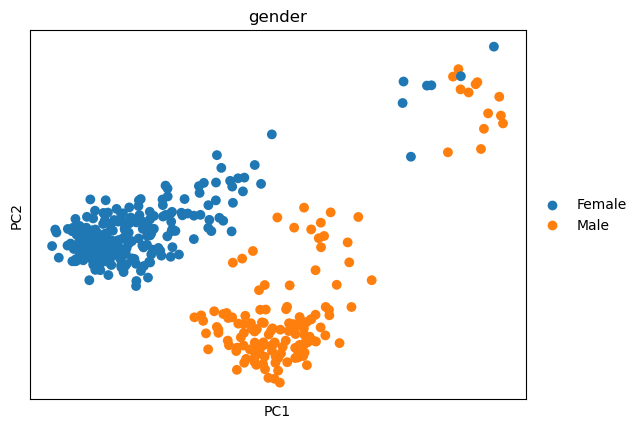

In [54]:
sc.pl.pca(dds, color= 'gender', size= 200)

In [ ]:
conda install -c "bioconda/label/cf201901" gseapy

In [133]:
conda install -c bioconda gseapy

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aubhi\anaconda3

  added / updated specs:
    - gseapy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gseapy-0.9.5               |             py_1          38 KB  bioconda
    ------------------------------------------------------------
                                           Total:          38 KB

The following NEW packages will be INSTALLED:

  gseapy             bioconda/noarch::gseapy-0.9.5-py_1 
  html5lib           pkgs/main/noarch::html5lib-1.1-pyhd3eb1b0_0 




gseapy-0.9.5         | 38 KB     |            |   0% 
gseapy-0.9.5         |

In [56]:
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [58]:
ranking = res[['stat']].dropna().sort_values('stat', ascending = False)
ranking

,stat
CTSE,11.066142
CFB,10.913882
HLA-F,10.310885
HLA-DPA1,10.203364
LAP3,9.424247
...,...
AREG,-8.181977
AKR1C1,-8.304943
GPX2,-8.897466
HPGD,-8.962546


In [68]:
ranking_2 = ranking.reset_index()
ranking_2

,index,stat
0,CTSE,11.066142
1,CFB,10.913882
2,HLA-F,10.310885
3,HLA-DPA1,10.203364
4,LAP3,9.424247
...,...,...
7794,AREG,-8.181977
7795,AKR1C1,-8.304943
7796,GPX2,-8.897466
7797,HPGD,-8.962546


In [70]:
ranking_3= ranking_2.set_index('index')
ranking_3

,stat
index,
CTSE,11.066142
CFB,10.913882
HLA-F,10.310885
HLA-DPA1,10.203364
LAP3,9.424247
...,...
AREG,-8.181977
AKR1C1,-8.304943
GPX2,-8.897466


In [65]:
gp.get_library_name() #to look at available libraries

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

In [78]:
#ENSEMBLE ID needed!
#YAP_gene_set = {'genes':['CYR61', 'CTGF', 'CDH6', 'SDC4']}
pre_res = gp.prerank(rnk = ranking_2,
                     gene_sets = ['GO_Biological_Process_2023'],
                     seed = 6, permutation_num = 100)

Exception: Error parsing gene_sets parameter for gene sets

In [83]:
#import gseapy as gp
# Load your gene ranking DataFrame
# Assuming your DataFrame is named 'ranking_2'
# Replace this step with loading your actual gene ranking data

# Convert the gene names to a list
gene_list = ranking_2.index.tolist()

# Load gene sets
gene_sets = 'GO_Biological_Process_2021'  # Replace with the name of the gene set collection you want to use

# Perform GSEA analysis
enrichment_result = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets)

# Print the results
print("Enrichment results:")
print(enrichment_result.res2d)

# Plot the results using barplot and dotplot
from gseapy.plot import barplot, dotplot

# Plot the results using barplot
barplot(enrichment_result.res2d, title='GO Biological Process 2021')

# Plot the results using dotplot
dotplot(enrichment_result.res2d)


2023-08-13 16:56:19,297 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


Enrichment results:
Empty DataFrame
Columns: [Term, Overlap, P-value, Adjusted P-value, Old P-value, Old Adjusted P-value, Odds Ratio, Combined Score, Genes, Gene_set]
Index: []


In [79]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

NameError: name 'pre_res' is not defined

In [84]:
pip install sanbomics

  Obtaining dependency information for sanbomics from https://files.pythonhosted.org/packages/d9/fd/7db4c680beaa619abc7d72cc18f58858ac6c49f5b261200824afd207e359/sanbomics-0.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.1 MB 10.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.1 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
res.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG,0.000000,NaN,NaN,NaN,NaN,NaN
A1BG-AS1,0.004019,0.196179,2.213756,0.088618,0.929385,NaN
A1CF,0.000000,NaN,NaN,NaN,NaN,NaN
A2M,0.006699,0.216789,2.387458,0.090803,0.927649,NaN
A2M-AS1,0.002679,0.196182,0.352483,0.556572,0.577820,NaN


In [89]:
res_2= res.reset_index()
res_2

,index,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,A1BG,0.000000,NaN,NaN,NaN,NaN,NaN
1,A1BG-AS1,0.004019,0.196179,2.213756,0.088618,0.929385,NaN
2,A1CF,0.000000,NaN,NaN,NaN,NaN,NaN
3,A2M,0.006699,0.216789,2.387458,0.090803,0.927649,NaN
4,A2M-AS1,0.002679,0.196182,0.352483,0.556572,0.577820,NaN
...,...,...,...,...,...,...,...
16378,NFIA-AS2,0.000000,NaN,NaN,NaN,NaN,NaN
16379,NFIB,0.227087,0.821557,0.459548,1.787749,0.073816,NaN
16380,NFIC,0.217039,0.285746,0.450483,0.634310,0.525879,NaN
16381,NFIL3,0.095792,-0.190064,0.774242,-0.245483,0.806082,NaN


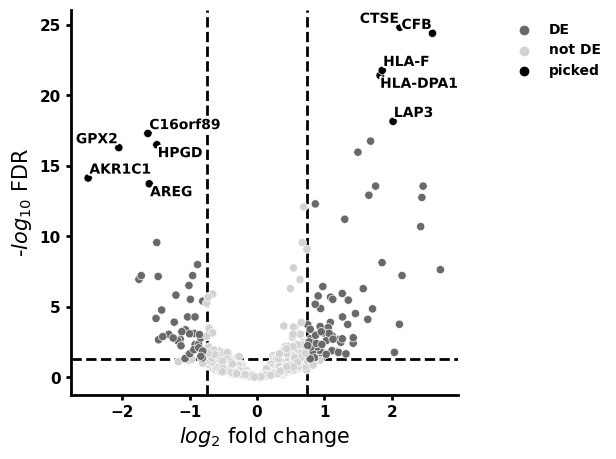

In [92]:
#volcano
from sanbomics.plots import volcano
volcano(res_2, symbol='index')

Read the data into an AnnData object

In [93]:
adata= sc.read_csv('counts_t_df_2.csv')

C:\Users\aubhi\anaconda3\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [94]:
adata.obs

""
A8_B001543
B2_B001558
B4_B001543
C19_B002079
C8_B001558
...
D15_B002078
H15_B000420
H16_B002078
B5_B001548


In [95]:
adata.var

""
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1
...
NFIA-AS2
NFIB
NFIC
NFIL3


The adata.var_names_make_unique() function is used in Scanpy to ensure that the variable (feature) names in the adata.var_names attribute are unique. It checks if there are any duplicate variable names and modifies them to make them unique if necessary.

In [96]:
adata.var_names_make_unique()

In [97]:
adata

AnnData object with n_obs × n_vars = 383 × 16383

In [98]:
adata.shape

(383, 16383)

In this data set we see 2987 cells (n_obs) and 31053 genes (n_vars).

In [99]:
adata.obs.head()  #We have 2987 such observations (cells)

""
A8_B001543
B2_B001558
B4_B001543
C19_B002079
C8_B001558


Note that the first column vlaues (e.g., AAACAAGTATCTCCCA-1	) represent the barcodes associated with each cell in the AnnData object.

In [100]:
adata.var.head() #We have 31053 such variables (genes)

""
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1


What are the highest expressed genes?

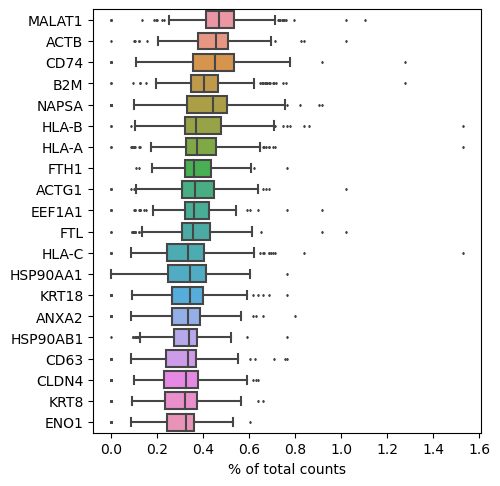

In [101]:
# Highest expressing genes function
sc.pl.highest_expr_genes(adata, n_top=20)

In [102]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [103]:
data_array = adata.X

In [104]:
data_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
data_array.shape

(383, 16383)

In [106]:
print (data_array[0:10, 0:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### This array contains infinite values. Remove them using a boolean mask

In [107]:
#sparse matrix is not supported for np
np.isnan(data_array)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [108]:
is_inf_values = np.isinf(data_array)

In [109]:
# Inspecting the effect of np.isinf vs ~np.isinf
print (np.isinf(is_inf_values))
print (~np.isinf(is_inf_values))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


### adatainfinite value removal failed misearbly 

In [113]:
adata.var_names[30000:]

Index([], dtype='object')

#### Ways to do that----- 

In [115]:
avnames= adata.var_names
lamp1 = avnames[avnames == 'Lamp1']
lamp1

Index([], dtype='object')

In [116]:
lamp1_2 = adata.var_names[adata.var_names == 'Lamp1']
lamp1_2

Index([], dtype='object')

In [117]:
adata.var_names

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'NFE2L2', 'NFE2L3', 'NFE4', 'NFIA', 'NFIA-AS1', 'NFIA-AS2', 'NFIB',
       'NFIC', 'NFIL3', 'NFIX'],
      dtype='object', length=16383)

#### Now applying this

In [118]:
mt_genes= adata.var_names[adata.var_names.str.startswith('mt-')]
mt_genes

Index([], dtype='object')

In [119]:
mt_genes.shape

(0,)

In [120]:
len(mt_genes)

0

### From a tutorial:
#### In an AnnData object, adata.X represents the attribute that stores the main data matrix, typically referred to as the "X" matrix. It contains the gene expression data, where each row corresponds to a cell (observation) and each column corresponds to a gene (variable). It is a sparse matrix representation of the gene expression data to efficiently handle large-scale single-cell RNA sequencing (scRNA-seq) datasets, where the majority of entries are zero. 

Print all genes with non-zero expression is a given cell.

# **Cleanup and data wrangling the data for analysis**

In [270]:
#sc.pp.calculate_qc_metrics(adata, inplace=True)

Mito exclusion

In [123]:
adata.var[adata.var.index.str.startswith('mt-')]

""


### Alternative way to the above process; breaking it down

In [124]:
adata.var.head(5) # adata is a dataframe!!!

""
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1


In [125]:
adata.obs.head(5)

""
A8_B001543
B2_B001558
B4_B001543
C19_B002079
C8_B001558


In [126]:
#genes= adata.var
#cells= adata.obs
#genes.index
#genes.columns
#gene_name= genes.index
#mito_bool= gene_name.str.startswith('mt-')
#mito_bool
#gene_name[mito_bool]
#gene_name[~mito_bool]

Tag all genes as True or False to be mitochondrial. 

In [127]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")

In [128]:
adata.var

,mt
A1BG,False
A1BG-AS1,False
A1CF,False
A2M,False
A2M-AS1,False
...,...
NFIA-AS2,False
NFIB,False
NFIC,False
NFIL3,False


In [130]:
adata.var['mt'].unique()

array([False])

Simiarly you can tag them as ribosomal. Download the ribosomal genes as csv from: https://www.gsea-msigdb.org/gsea/msigdb/human/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=CSV

In [284]:
#ribo_genes = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data/Transcriptomics/KEGG_RIBOSOME.v2023.1.Hs.csv', skiprows=2, header=None)
#ribo_genes

Now tag all genes as True or false for ribosomes, similar to mito. 

In [285]:
#adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [286]:
#adata.var

In [287]:
#adata

In [288]:
# Mito has already been deleted
#sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [133]:
#QC matrix adds a bnch of info- genes by counts and others
sc.pp.calculate_qc_metrics(adata, inplace=True)

Make sure that metrics are added to adata obs and var. 

In [134]:
adata

AnnData object with n_obs × n_vars = 383 × 16383
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

Histogram

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

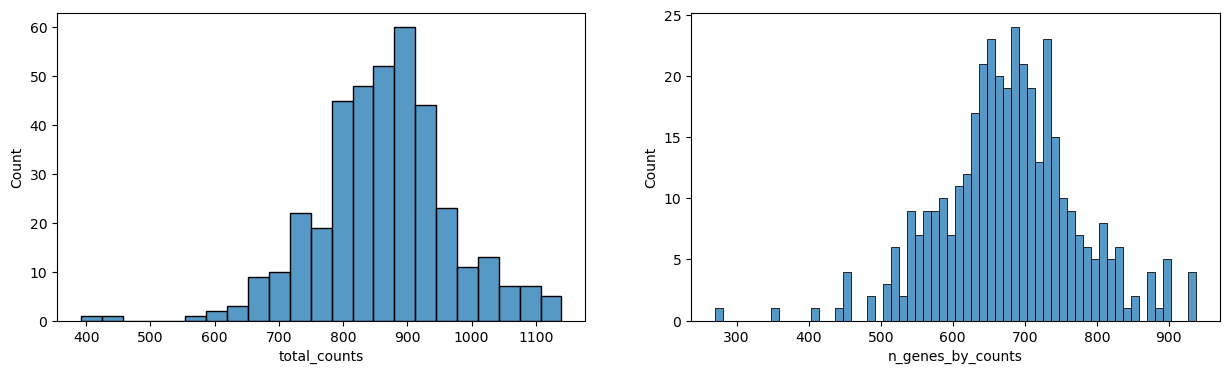

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


<Axes: xlabel='total_counts', ylabel='Count'>

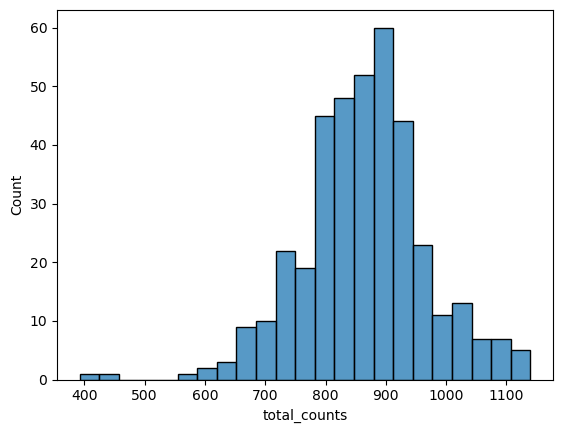

In [136]:
sns.histplot(adata.obs['total_counts'])

**Filtering**

In [137]:
adata.obs.sort_values('total_counts')

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
A1_B003523,270,5.602119,392.0,5.973810,40.051020,56.632653,82.142857,100.000000
F6_B001554,348,5.855072,436.0,6.079933,27.752294,43.119266,66.055046,100.000000
B8_B003528,451,6.113682,581.0,6.366470,23.752151,39.586919,56.798623,100.000000
L4_B003528,451,6.113682,595.0,6.390241,24.033613,40.840336,57.815126,100.000000
G7_B003528,455,6.122493,605.0,6.406880,24.132231,40.661157,57.851240,100.000000
...,...,...,...,...,...,...,...,...
M21_B002097,932,6.838405,1116.0,7.018402,12.275986,21.236559,34.408602,61.290323
G4_B001558,894,6.796824,1117.0,7.019297,12.264996,21.217547,37.869293,64.726947
L7_B001545,937,6.843750,1133.0,7.033506,12.180053,21.006178,34.951456,61.429832
L21_B002078,935,6.841615,1136.0,7.036149,11.707746,20.510563,35.299296,61.707746


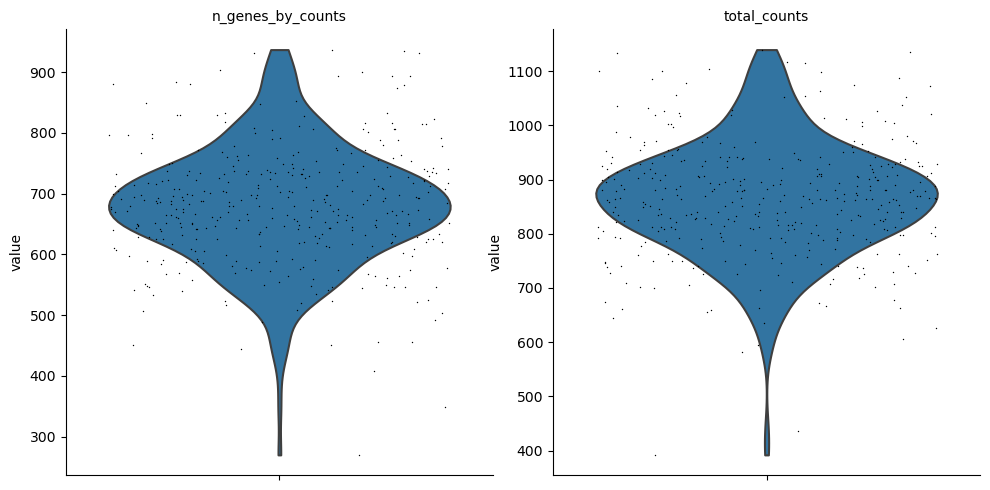

In [138]:
#Original code
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
             #jitter=0.4, multi_panel=True)

#Modified
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], 
             jitter=0.4, multi_panel=True)

In [306]:
#pct mito count is not present
#sc.pp.filter_cells(adata, min_counts=5000)
#adata_filtered_3= sc.pp.filter_cells(adata_filtered_2, max_counts=35000)
#adata = adata[adata.obs["pct_counts_mt"] < 20]  
#adata = adata[adata.obs["pct_counts_ribo"] < 2]

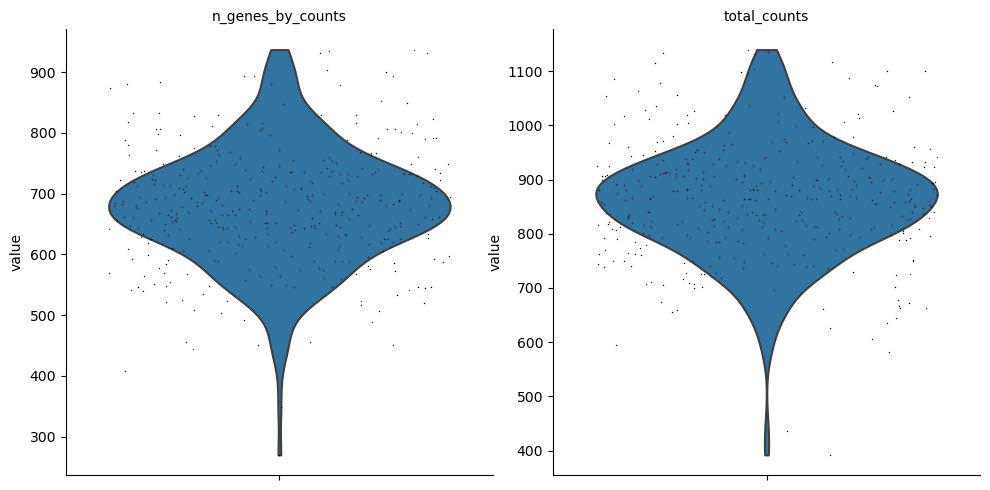

In [139]:
#Original code after filtering
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
             #jitter=0.4, multi_panel=True)
    
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], 
             jitter=0.4, multi_panel=True)

Min cells filter

In [307]:
sc.pp.filter_genes(adata, min_cells=10) #Filter genes based on minimum number of cells. 

Pre-processing: normalize and log transform <br>

In [140]:
adata.var

,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
A1BG,False,0,0.000000,0.000000,100.000000,0.0,0.000000
A1BG-AS1,False,1,0.002611,0.002608,99.738903,1.0,0.693147
A1CF,False,0,0.000000,0.000000,100.000000,0.0,0.000000
A2M,False,2,0.005222,0.005208,99.477807,2.0,1.098612
A2M-AS1,False,1,0.002611,0.002608,99.738903,1.0,0.693147
...,...,...,...,...,...,...,...
NFIA-AS2,False,0,0.000000,0.000000,100.000000,0.0,0.000000
NFIB,False,73,0.208877,0.189692,80.939948,80.0,4.394449
NFIC,False,76,0.211488,0.191850,80.156658,81.0,4.406719
NFIL3,False,39,0.101828,0.096970,89.817232,39.0,3.688879


Let us find the gene with most counts and plot it before and after normalization

In [141]:
# Sum the gene expression counts across cells
gene_counts_sum = np.sum(adata.X, axis=0)
# Find the gene with the highest sum
gene_with_most_counts = adata.var_names[np.argmax(gene_counts_sum)]
print("Gene with the most counts:", gene_with_most_counts)

Gene with the most counts: MALAT1


In [146]:
# Specify the gene name
gene_name = 'LAMP1'

# Get the index of the gene in adata.var_names
gene_index = list(adata.var_names).index(gene_name)

# Extract the gene expression counts for the gene
gene_counts = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_array = gene_counts.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_array, bins=30)
plt.title(f"Histogram of Counts per Cell for Gene {gene_name}")
plt.xlabel("Counts per Cell")
plt.ylabel("Frequency")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [147]:
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)

In [148]:
# Get the normalized gene expression counts for the gene
gene_counts_normalized = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_normalized_array = gene_counts_normalized.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_normalized_array, bins=30)
plt.title(f"Histogram of Normalized Counts per Cell for Gene {gene_name}")
plt.xlabel("Normalized Counts per Cell")
plt.ylabel("Frequency")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [149]:
#Log transform the data
sc.pp.log1p(adata)

In [150]:
# Get the log-transformed gene expression counts for the gene
gene_counts_log_transformed = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_log_transformed_array = gene_counts_log_transformed.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_log_transformed_array, bins=30)
plt.title(f"Histogram of Log-Transformed Counts per Cell for Gene {gene_name}")
plt.xlabel("Log-Transformed Counts per Cell")
plt.ylabel("Frequency")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

Now the count values are within a small range (instead of orders of magnitude). 

# **Identify highly-variable genes**

In [151]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

Notice that a new column labeled highly_variable is added to the daraframe with True or false in addition to columns with some stats (means, dispersions, diseprsions_norm)

In [152]:
adata.var

,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
A1BG,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
A1BG-AS1,False,1,0.002611,0.002608,99.738903,1.0,0.693147,False,2.559773e-02,2.295609,-0.730911
A1CF,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
A2M,False,2,0.005222,0.005208,99.477807,2.0,1.098612,True,9.143589e-02,3.049383,2.926702
A2M-AS1,False,1,0.002611,0.002608,99.738903,1.0,0.693147,False,2.841116e-02,2.401301,-0.218053
...,...,...,...,...,...,...,...,...,...,...,...
NFIA-AS2,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,1.000000e-12,NaN,NaN
NFIB,False,73,0.208877,0.189692,80.939948,80.0,4.394449,False,1.204797e+00,2.370144,0.035562
NFIC,False,76,0.211488,0.191850,80.156658,81.0,4.406719,False,1.253927e+00,2.396895,0.192601
NFIL3,False,39,0.101828,0.096970,89.817232,39.0,3.688879,False,7.887667e-01,2.373054,-0.429141


Let us create a plot showing the gene expression dispersion and mean relationship for genes, highlighting those genes that exhibit higher variability across cells.

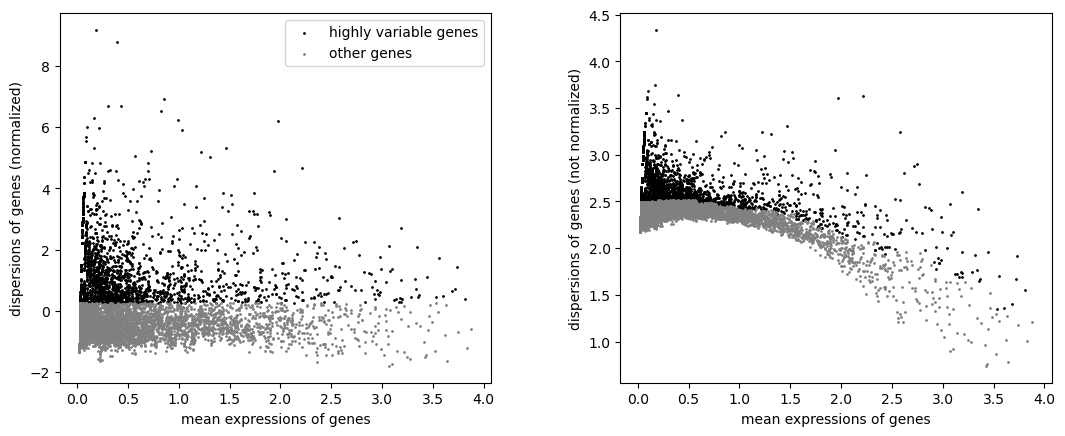

In [153]:
sc.pl.highly_variable_genes(adata)

**Dimensionality reduction:** 

In [154]:
adata = adata[:, adata.var.highly_variable]

In [155]:
sc.pp.pca(adata) #By default calculates 30 PCAs

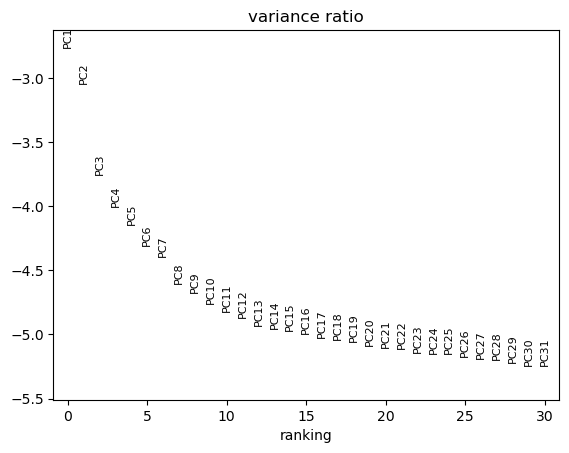

In [156]:
sc.pl.pca_variance_ratio(adata, log=True)

In [157]:
sc.pp.neighbors(adata, n_pcs=20)

C:\Users\aubhi\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\aubhi\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\aubhi\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [165]:
pip install scanpy tensorflow umap-learn

  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Obtaining dependency information for werkzeug>=1.0.1 from https://files.pythonhosted.org/packages/ba/d6/8040faecaba2feb84e1647af174b3243c9b90c163c7ea407820839931efe/Werkzeug-2.3.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/242.5 kB ? eta -:--:--
   --------------- ------------------------ 92.2/242.5 kB 5.5 MB/s eta 0:00:01
   --------------- ------------------------ 92.2/242.5 kB 5.5 MB/s eta 0:00:01
   ----------------------- ---------------- 143.4/242.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 174.1/242.5 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 235.5/242.5 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 242.5/242.5 kB 992.6 kB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing in

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\aubhi\\anaconda3\\Lib\\site-packages\\~-nsorflow\\python\\bfloat16.so'
Consider using the `--user` option or check the permissions.



In [169]:
#!pip install --upgrade scanpy
#!pip install --upgrade umap-learn

SyntaxError: invalid syntax (3418524571.py, line 1)

In [166]:
pip install git+https://github.com/theislab/scanpy.git@1.7.0rc1

  Cloning https://github.com/theislab/scanpy.git (to revision 1.7.0rc1) to c:\users\aubhi\appdata\local\temp\pip-req-build-fy49hc71
  Resolved https://github.com/theislab/scanpy.git to commit 6055f4414368b3a4d278d031346a7664f3e7a41c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scanpy: filename=scanpy-1.7.0rc1-py3-none-any.whl size=10222765 sha256=cf3c55108b011505741256ffe7783c0976e0fe03a95168852f46bcf9f07107a0
  Stored in directory: C:\Users\aubhi\AppData\Local\Temp\pip-ephem-wheel-cache-c4ntwutj\wheels\a8\f5\cb\a9e6de8bbcbfd2b43596c1b947d11d875dcf424c14dfc01499
Successfully built scanpy
  Attempting uninstall: scanpy
    Found existing installation: scanpy 1.9.3
    Uninstalling scanpy

  Running command git clone --filter=blob:none --quiet https://github.com/theislab/scanpy.git 'C:\Users\aubhi\AppData\Local\Temp\pip-req-build-fy49hc71'
  Running command git checkout -q 6055f4414368b3a4d278d031346a7664f3e7a41c


In [171]:
pip install "scanpy==1.7.0rc1


     ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
      --------------------------------------- 0.2/10.2 MB 3.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/10.2 MB 7.2 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/10.2 MB 8.9 MB/s eta 0:00:02
     ----- ---------------------------------- 1.5/10.2 MB 8.5 MB/s eta 0:00:02
     ------- -------------------------------- 2.0/10.2 MB 9.3 MB/s eta 0:00:01
     --------- ------------------------------ 2.5/10.2 MB 8.8 MB/s eta 0:00:01
     ---------- ----------------------------- 2.7/10.2 MB 8.6 MB/s eta 0:00:01
     ----------- ---------------------------- 3.0/10.2 MB 8.4 MB/s eta 0:00:01
     ------------ --------------------------- 3.3/10.2 MB 8.1 MB/s eta 0:00:01
     -------------- ------------------------- 3.6/10.2 MB 7.6 MB/s eta 0:00:01
     --------------- ------------------------ 3.9/10.2 MB 7.5 MB/s eta 0:00:01
     ---------------- ----------------------- 4.1/10.2 MB 

In [194]:
pip install umap-learn==0.4.6 


  Using cached umap_learn-0.4.6-py3-none-any.whl
  Attempting uninstall: umap-learn
    Found existing installation: umap-learn 0.4.3
    Uninstalling umap-learn-0.4.3:
      Successfully uninstalled umap-learn-0.4.3


In [202]:
conda install -c conda-forge umap-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aubhi\anaconda3

  added / updated specs:
    - umap-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/win-64::certifi-2023.7.22-p~ --> conda-forge/noarch::certifi-2023.7.22-pyhd8ed1ab_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [203]:
sc.tl.umap(adata, n_components=2) # Solution for this was found on https://github.com/scverse/scanpy/issues/1579

TypeError: simplicial_set_embedding() missing 3 required positional arguments: 'densmap', 'densmap_kwds', and 'output_dens'

In [205]:
help(sc.tl.umap)

Help on function umap in module scanpy.tools._umap:

umap(adata: anndata._core.anndata.AnnData, min_dist: float = 0.5, spread: float = 1.0, n_components: int = 2, maxiter: Optional[int] = None, alpha: float = 1.0, gamma: float = 1.0, negative_sample_rate: int = 5, init_pos: Union[Literal['paga', 'spectral', 'random'], numpy.ndarray, NoneType] = 'spectral', random_state: Union[NoneType, int, numpy.random.mtrand.RandomState] = 0, a: Optional[float] = None, b: Optional[float] = None, copy: bool = False, method: Literal['umap', 'rapids'] = 'umap', neighbors_key: Optional[str] = None) -> Optional[anndata._core.anndata.AnnData]
    Embed the neighborhood graph using UMAP [McInnes18]_.
    
    UMAP (Uniform Manifold Approximation and Projection) is a manifold learning
    technique suitable for visualizing high-dimensional data. Besides tending to
    be faster than tSNE, it optimizes the embedding such that it best reflects
    the topology of the data, which we represent throughout Scanpy 

In [159]:
#This code is working
sc.tl.pca(adata)

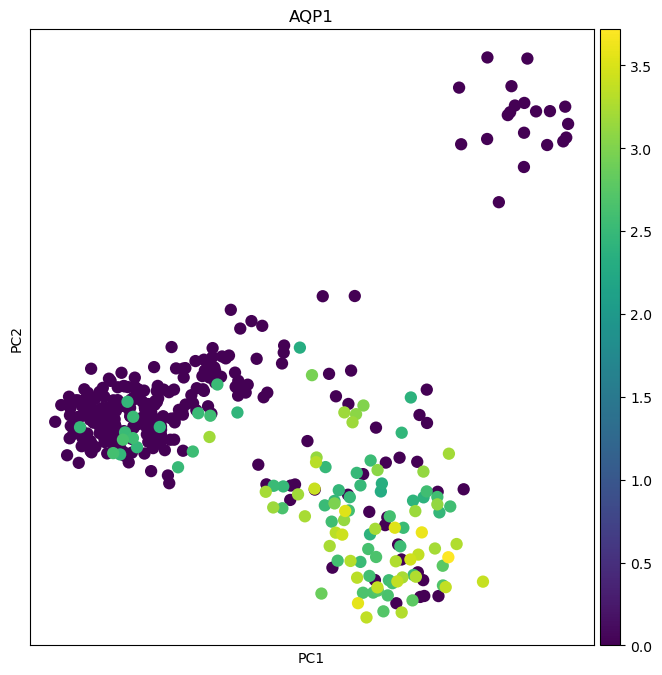

In [196]:
sc.pl.pca(adata, color = 'AQP1')

C:\Users\aubhi\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


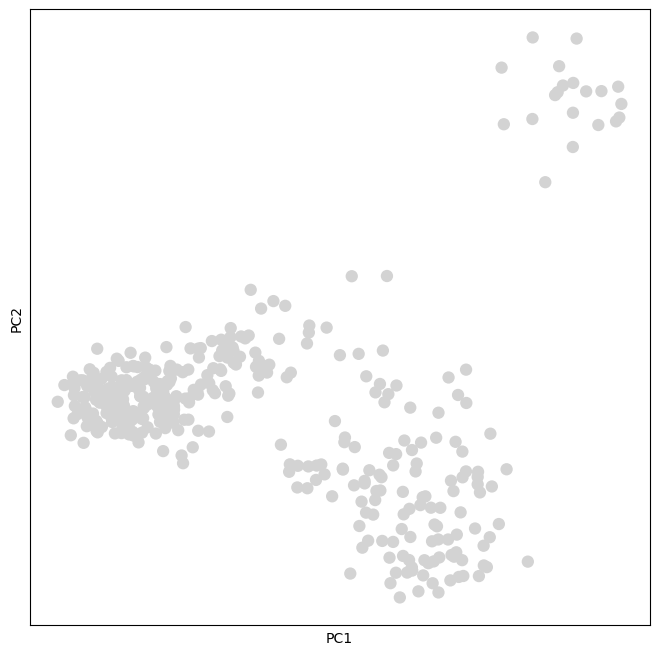

In [197]:
sc.pl.pca(adata)

KeyError: 'Could not find key MALAT1 in .var_names or .obs.columns.'

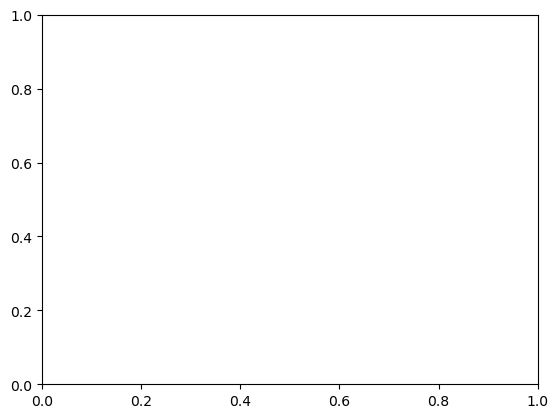

In [163]:
sc.pl.pca(adata, color= ['MALAT1'])

Plot the umap components to visualize the data. This data needs to be clustered into various clusters. 

In [164]:
sc.pl.umap(adata)

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [173]:
sc.pl.umap(adata, color= ['MALAT1'])

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

Let us visualize results for a few selected Genes. First, let's have a quick look at the gene names and pick the ones that showed up in large number of cells. 

In [174]:
sorted_by_num_cells = adata.var['n_cells_by_counts'].sort_values(ascending=False)
sorted_by_num_cells


HLA-A           381
HLA-B           381
FTL             381
HLA-C           379
CD74            377
               ... 
CPB1              1
MEP1A             1
LOC100129148      1
ARL8A             1
KLB               1
Name: n_cells_by_counts, Length: 2000, dtype: int64

In [175]:
sorted_by_num_cells.head(20)

HLA-A       381
HLA-B       381
FTL         381
HLA-C       379
CD74        377
KRT18       374
HLA-DRB1    369
CST3        365
HLA-DRA     363
CTSH        361
HLA-E       359
ANXA1       357
DNAJB1      354
NEAT1       354
NAPSA       353
KRT19       349
HLA-DRB5    349
IFITM3      348
HSPA8       343
HSPB1       342
Name: n_cells_by_counts, dtype: int64

In [176]:
top_20= sorted_by_num_cells.head(20)
top_20.index

Index(['HLA-A', 'HLA-B', 'FTL', 'HLA-C', 'CD74', 'KRT18', 'HLA-DRB1', 'CST3',
       'HLA-DRA', 'CTSH', 'HLA-E', 'ANXA1', 'DNAJB1', 'NEAT1', 'NAPSA',
       'KRT19', 'HLA-DRB5', 'IFITM3', 'HSPA8', 'HSPB1'],
      dtype='object')

In [177]:
sc.pl.umap(adata, color=["Gm42418", "Fth1", "3110035E14Rik"])

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [178]:
sc.pl.umap(adata, color= top_20.index)

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

**We are ready to perform clustering**

The library "leidenalg" is a Python library that provides an implementation of the Leiden algorithm for community detection in networks. The Leiden algorithm is a popular method for detecting communities or clusters within a network, often applied in the field of network analysis and graph-based data analysis.

In [345]:
!pip install leidenalg

  Obtaining dependency information for leidenalg from https://files.pythonhosted.org/packages/64/a3/25727f99c7d9bb702d3a77a4431dc378745224bc96a8d5f295810213bf78/leidenalg-0.10.1-cp38-abi3-win_amd64.whl.metadata
  Obtaining dependency information for igraph<0.11,>=0.10.0 from https://files.pythonhosted.org/packages/e4/2c/aea4c9ff8d33c1ba45d3964d758019097c363363c1a67dbada9d9f98b3d9/igraph-0.10.6-cp39-abi3-win_amd64.whl.metadata
   ---------------------------------------- 1.6/1.6 MB 9.9 MB/s eta 0:00:00
   ---------------------------------------- 2.9/2.9 MB 12.3 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



*   **sc.tl.leiden(adata, key_added="clusters"):** This function applies the Leiden algorithm for community detection on the preprocessed data. It identifies clusters of cells based on the neighborhood information previously computed. The resulting clusters are assigned as annotations and added to the adata object with the key name "clusters".





In [179]:
sc.tl.leiden(adata, resolution=0.6, key_added="clusters") #Experiment with values 0.3, 0.6, and 1.0. View the result in the UMAP plot below. 

A new column (last one) gets added to obs with the cluster label. 

In [180]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters
A8_B001543,881,6.782192,1072.0,6.978214,13.432836,22.761194,36.473881,64.458955,4
B2_B001558,849,6.745236,1074.0,6.980076,13.128492,22.439479,39.571695,67.504655,4
B4_B001543,823,6.714171,1027.0,6.935370,14.118793,23.855891,39.337877,68.549172,4
C19_B002079,833,6.726233,1019.0,6.927558,13.837095,23.650638,37.880275,67.320903,4
C8_B001558,893,6.795706,1105.0,7.008505,12.850679,21.900452,37.285068,64.434389,4
...,...,...,...,...,...,...,...,...,...
D15_B002078,798,6.683361,997.0,6.905753,14.744233,24.774323,40.020060,70.110331,2
H15_B000420,728,6.591674,872.0,6.771935,14.564220,26.032110,39.449541,73.853211,2
H16_B002078,683,6.527958,870.0,6.769642,18.505747,30.000000,44.482759,78.965517,0
B5_B001548,761,6.635947,945.0,6.852242,14.497354,25.079365,40.634921,72.380952,1


UMAP with color code

In [181]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

Spatial plot with total and n_genes_by_counts

==========================================================

# **Find marker genes**

*   **sc.tl.rank_genes_groups(adata, "clusters", method="t-test"):** This function performs differential gene expression analysis between different clusters defined by the "clusters" column in the adata.obs dataframe. It compares the gene expression profiles between the clusters using a statistical test, such as the t-test, to identify genes that are differentially expressed between the clusters. The results of the analysis are stored in the adata object.

In [183]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")  #Group by clusters and perform differential gene expression analysis using t-tets (also try 'wilcoxon')


*   **sc.pl.rank_genes_groups(adata, n_genes=10):** This function creates plot used to visualize the results of gene ranking after performing differential expression analysis between groups of cells. It provides insights into the genes that are differentially expressed and potentially associated with specific groups or conditions in your dataset.

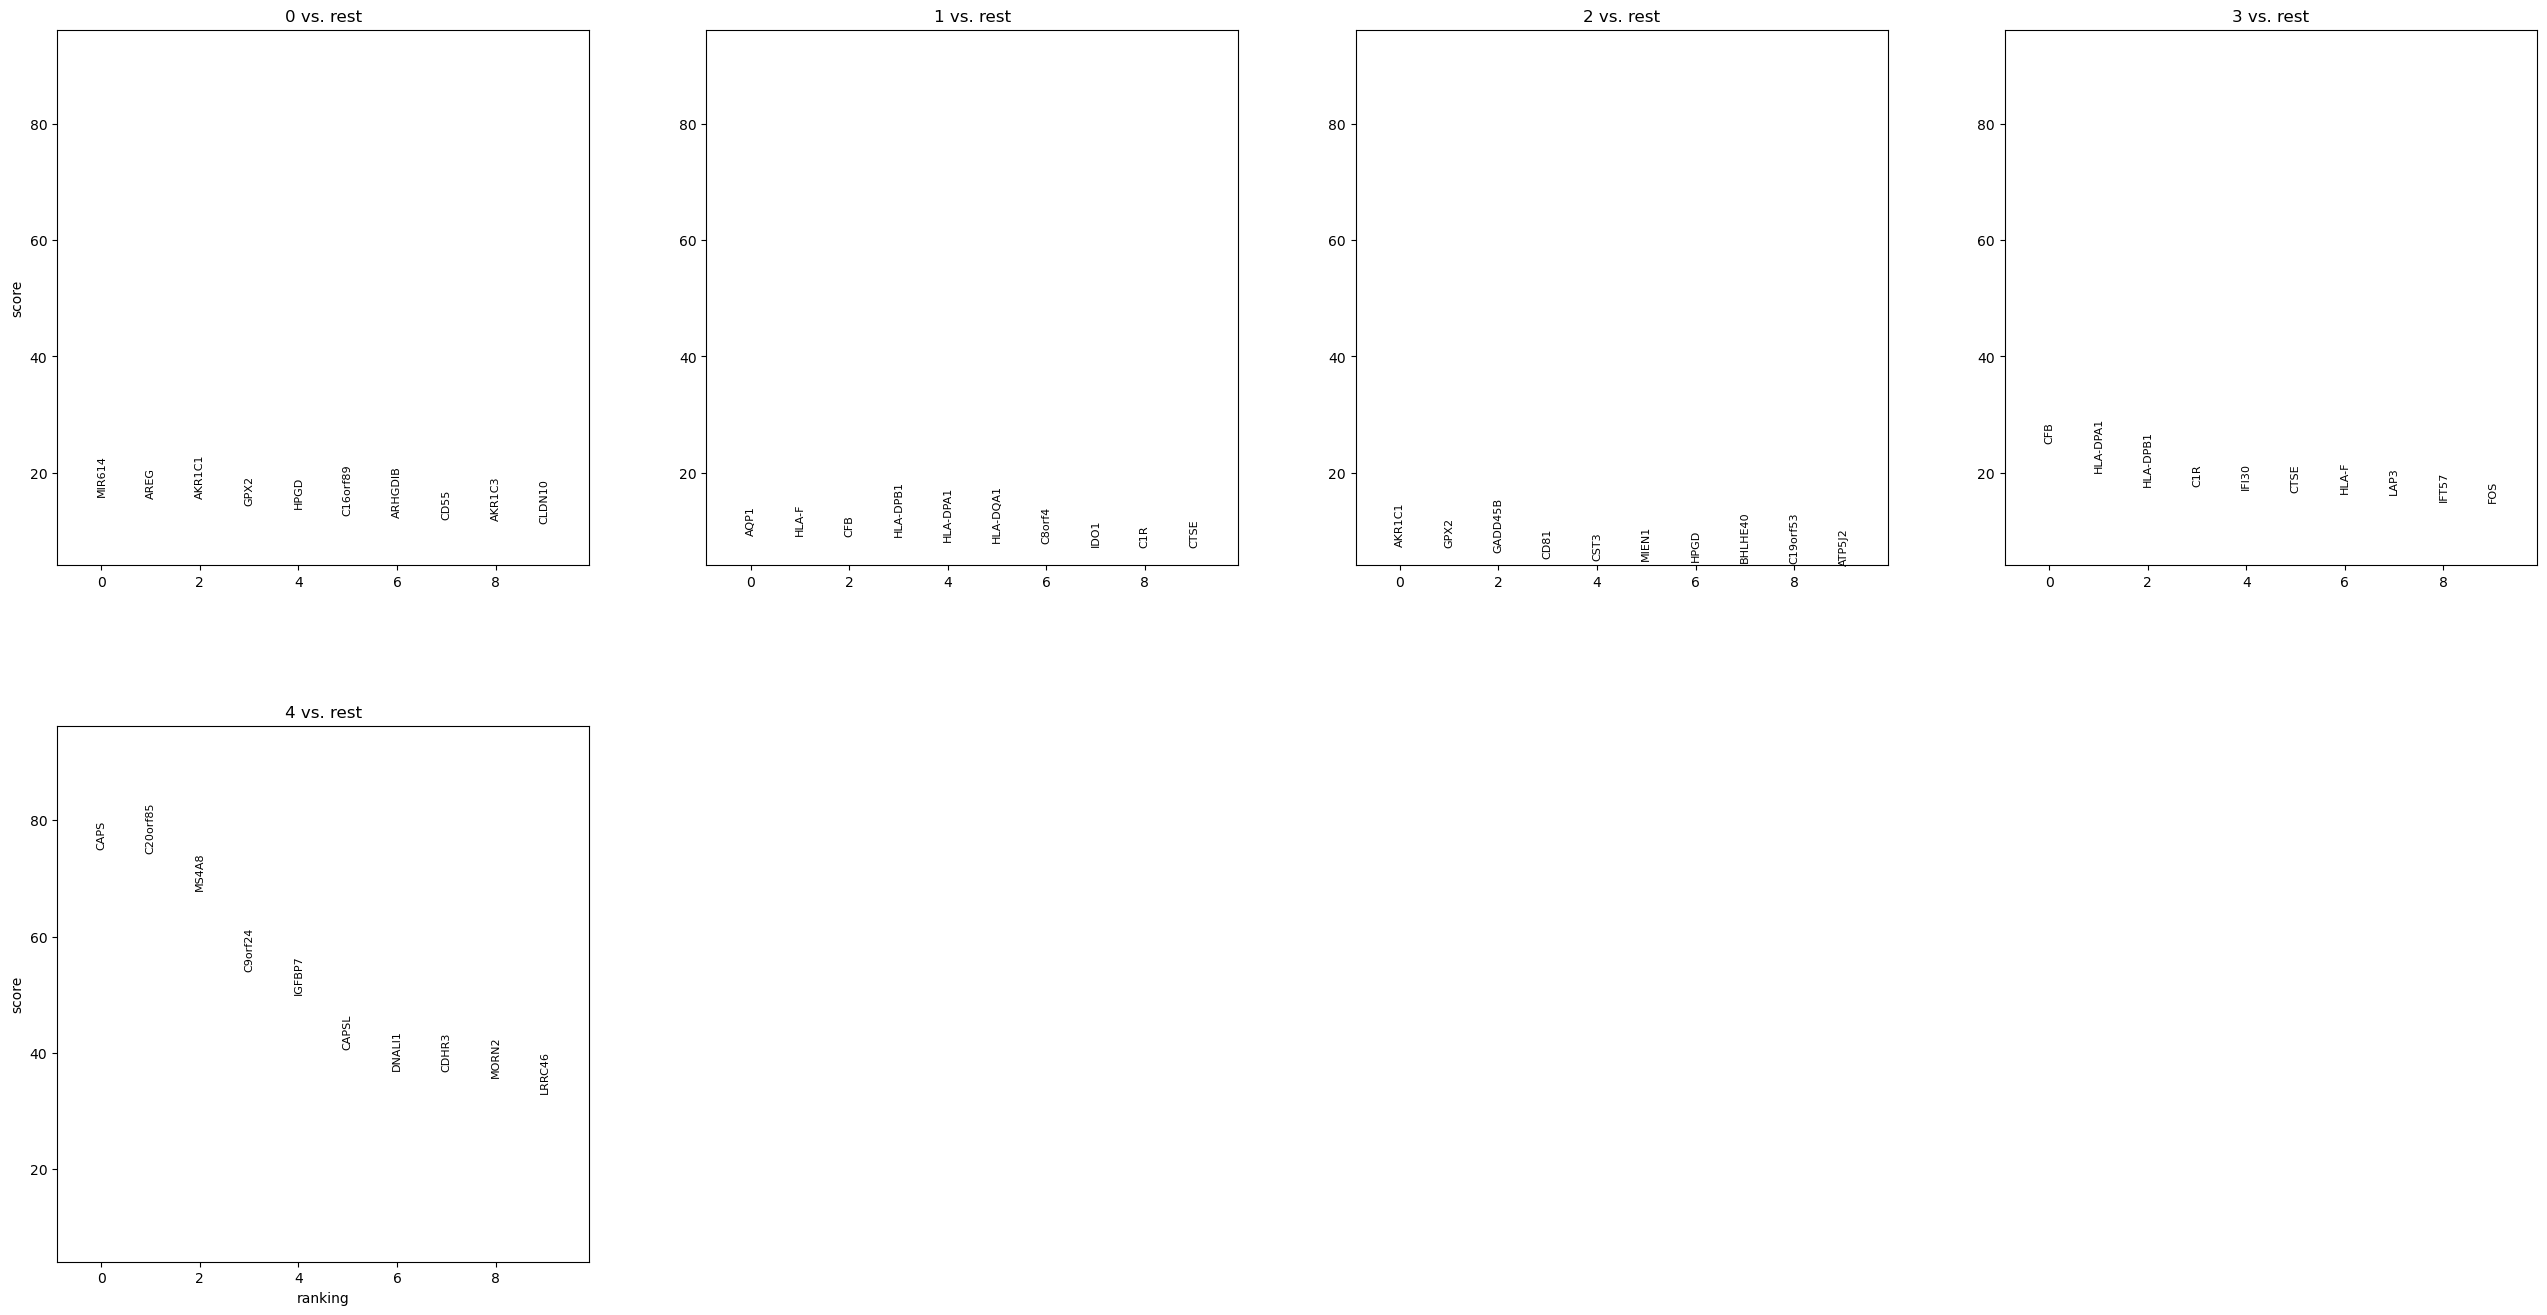

In [184]:
sc.pl.rank_genes_groups(adata, n_genes=10)



*   **sc.pl.rank_genes_groups_heatmap(adata, groups="5", n_genes=10, groupby="clusters"):** This function creates a heatmap visualization of the top differentially expressed genes associated with a specific cluster/group ("4" in this case) from the results of the differential gene expression analysis.



**Top gene per cluster**

In [186]:
# Obtain the top features for each cluster
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names


In [187]:
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]  

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
MIR614
AREG
AKR1C1
GPX2
HPGD
C16orf89
ARHGDIB
CD55
AKR1C3
CLDN10

Cluster 1 top features:
AQP1
HLA-F
CFB
HLA-DPB1
HLA-DPA1
HLA-DQA1
C8orf4
IDO1
C1R
CTSE

Cluster 2 top features:
AKR1C1
GPX2
GADD45B
CD81
CST3
MIEN1
HPGD
BHLHE40
C19orf53
ATP5J2

Cluster 3 top features:
CFB
HLA-DPA1
HLA-DPB1
C1R
IFI30
CTSE
HLA-F
LAP3
IFT57
FOS

Cluster 4 top features:
CAPS
C20orf85
MS4A8
C9orf24
IGFBP7
CAPSL
DNALI1
CDHR3
MORN2
LRRC46



In [188]:
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("scanpy_result.csv")

The names, longfoldchanges, scores and p values for each data points in each cluster is exported to a csv file that can be used to identify cell types in each cluster. 

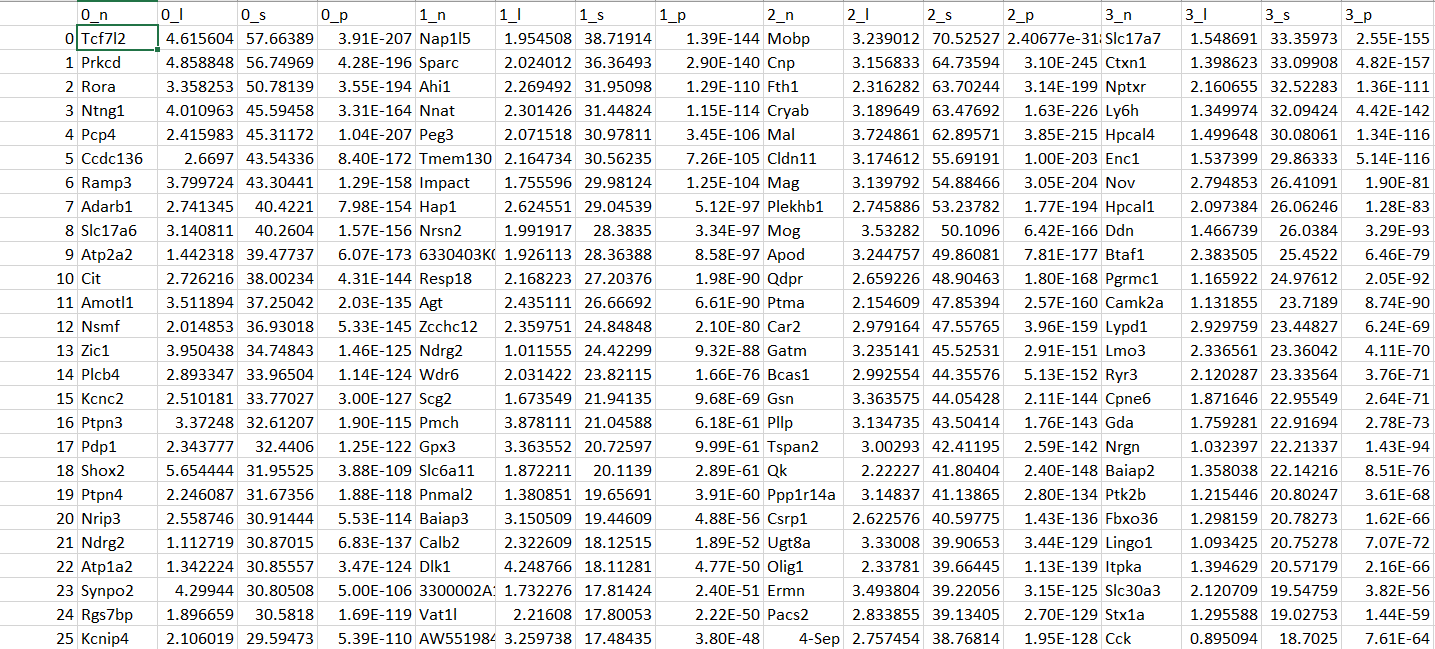